>Below is a copied and translated version of seaborn tutorial (v0.12.2) from the seaborn official docs.
>
>해당 내용은 seaborn 공식 문서에서 제공하는 seaborn 튜토리얼(v0.12.2)의 단순 필사 및 번역본입니다.  
>     
> © Copyright 2012-2022, Michael Waskom. (https://seaborn.pydata.org/tutorial.html#)

# 통계적 추정과 에러바
Statistical estimation and error bars

데이터를 시각화하다 보면 여러 데이터 포인트를 압축(reudce)해서 요약통계정보(summary static; 평균, 중앙값 등)으로 나타내는 과정이 필요하기도 합니다.
이런 요약통계를 사용할 때는 그 요약이 데이터 포인트들을 얼마나 잘 나타내는지에 대한 시각적 단서인 error bar를 추가해주는 것이 좋습니다.  
<br>
seaborn의 function은 전체 데이터셋이 주어지면 이런 요약통계와 error bar를 자동으로 계산해주기도 합니다. 
이번 챕터에서는 error bar로 보여줄 정보를 어떻게 선택하는지, 어떤 옵션을 선택해야 하는지에 대해 알아보겠습니다.  
<br>
중심경향 추정치 주변의 error bar는 두 가지 정보 ('불확실성의 범위'와 '추정치 주변 데이터의 확산') 중 하나를 나타낼 수 있습니다. 
이 둘은 서로 연관되어 있습니다 : 
동일한 표본 크기에서 데이터의 확산(spread)가 커지면 추정치의 불확실성도 커집니다. 반면, 표본 크기가 커지면 불확실성은 감소하지만 확산은 그렇지 않습니다.  
<br>
seaborn에서는 위의 두 error bar의 종류별 만드는 방법이 있습니다.  
* parameteric(모수식) : 분포의 모양에 대한 가정에 의존하는 공식을 사용하는 방식  
* nonparametric(비모수식) : 사용자가 제공한 데이터만 사용하는 방식

<br>  

플롯팅 과정에 추정(estimation)이 포함된 function에는 `errorbar` parameter가 있습니다. 
사용자는 이 parameter에 사용할 method의 이름과 interval size 매개변수를 넣어서 제어할 수 있습니다. 
사용자의 선택지는 error bar가 표현되는 방법과 구성방법에 따라 아래와 같이 2D 분류 체계로 정의할 수 있습니다 : 
<br>  
[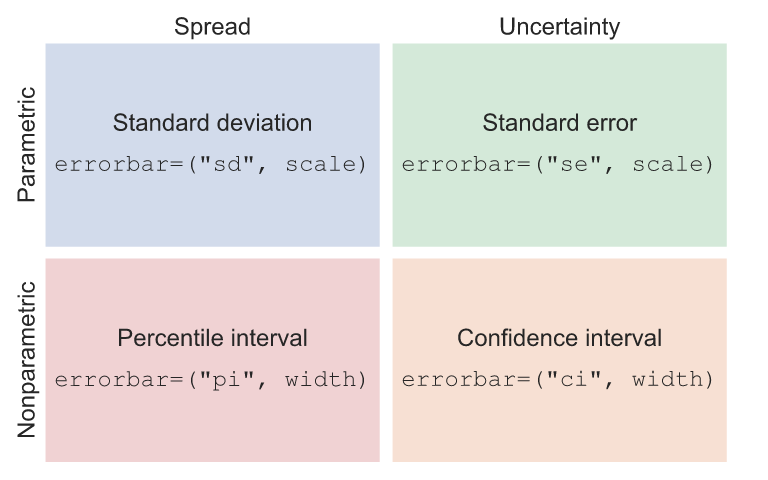](https://seaborn.pydata.org/_images/error_bars_2_0.svg)
<br>  
위의 표를 보면 parametric일 때와 nonparametric일 때 size parameter가 다르게 정의되어 있습니다. 
parametric error bar의 경우, size는 오차를 정의하는 통계(표준오차 또는 표준편차)를 곱한 스칼라 계수입니다. 
nonparametric error bar의 경우, 백분위수 너비입니다. 
각각의 자세한 내용은 아래에서 살펴보겠습니다.
<br>
>여기에 설명된 error bar API는 seaborn v0.12에 도입되었습니다. 이전 버전에서는 부트스트랩 신뢰 구간 또는 표준 편차를 표시하는 옵션만 있었으며, 선택은 `ci` parameter(즉, `ci=<size>` 또는 `ci="sd"`)로 제어할 수 있었습니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

서로 다른 매개변수화(parameterization)을 비교하기 위해서, 다음의 helper function을 사용하겠습니다 : 

In [2]:
def plot_errorbars(arg, **kws) :
    np.random.seed(sum(map(ord, 'error_bars')))
    x = np.random.normal(0, 1, 100)
    f, axs = plt.subplots(2, figsize=(7, 2), sharex=True, layout='tight')
    sns.pointplot(x=x, errorbar=arg, **kws, capsize=.3, ax=axs[0])
    sns.stripplot(x=x, jitter=.3, ax=axs[1])

## 데이터의 확산 측정
Measures of data spread

데이터 분포를 나타내는 error bar는 분포를 3가지 정보(숫자)를 이용해서 요약해줍니다. (`boxplot()`은 5개 이상의 숫자를 사용하고, `violinplot()`은 복잡한 알고리즘을 사용해서 보여줍니다.)

### 표준 편차 오차 막대
Standard deviation error bars

<br>

표준편차(standard deviation) error bar는 가장 단순하게 보여주기 좋은 방법입니다. 
우리에게 가장 익숙한 방법인 표준편차는 각 데이터포인트에서 샘플평균까지의 거리의 평균값입니다. 
default로는 `errorbar="sd"`이 추정치에서 (-1 x sd) ~ (+1 x sd) 의 범위에 error bar를 그리게 되고, scaliing size parameter를 이용해서 범위를 조정할 수도 있습니다. 
정규분포라는 가정하에, 데이터의 약 68%가 (1 x sd) 범위 내에, 약 95%의 데이터가 (2 x sd) 범위 내에, 약 97% 데이터가 (3 x sd) 범위 내에 위치하게 됩니다.

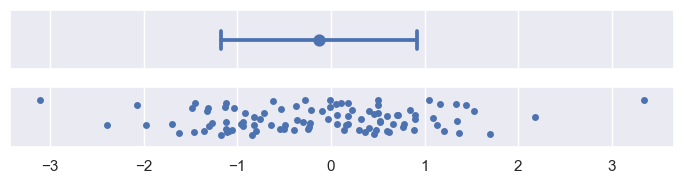

In [3]:
plot_errorbars('sd')

### 백분위수 구간 error bar
Percentile interval error bars

<br>

백분위수 구간(percentile intervals)도 데이터가 속하는 범위를 표시하지만, 샘플 데이터에서 직접 백분위수를 구한다는 점에서는 다릅니다. 
`errorbar="pi"`는  default로 데이터의 95%가 속하는 2.5% ~ 97.5% 구간을 표시합니다. 
사용자는 size parmeter를 이용해서 사분위수 범위 같이 특정 범위를 나타낼 수도 있습니다 :

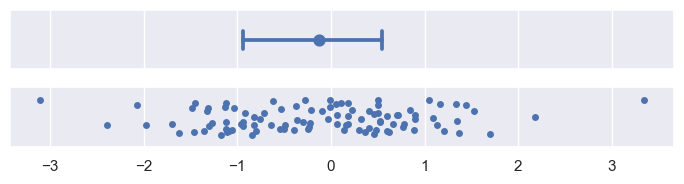

In [4]:
plot_errorbars(("pi", 50))

표준편차 error bar는 항상 추정치를 중심으로 대칭을 이루게 됩니다. 
이런 특성 때문에 데이터가 왜곡된 경우(skewed), 특히 데이터의 특성상 한계가 있을 수 밖에 없는 경우 (ex. 데이터가 양수 값만 가질 수 있을 때) 문제가 될 수 있습니다. 
그래서 경우에 따라서는 error bar가 "불가능한"값까지 확장되어 보여지기도 합니다.
단, 비모수적(nonparametric) 방식은 비대칭 확산이 가능하고 데이터 범위를 절대 넘어가지 않기 때문에 이런 문제가 발생하지 않습니다.

## 데이터의 불확실성 측정
Measures of data uncertainty

분석하고자 하는 데이터가 더 큰 모집단으로부터의 무작위 표본(sample)인 경우, 그 데이터의 평균(혹은 다른 추정치)은 실제 모수(모집단의 추정치)와 완전히 같다고 할 수 없습니다. 
추정치의 불확실성을 나타내는 error bar는 실제 parameter(여기서는 모집단)에 대한 값이 존재할 것으로 예상되는 범위를 나타냅니다.

### 표준 error bar
Standard error bars

<br>

표준 오차 통계(standard error statistics)는 표준편차와 관련 있습니다 : (표준오차 = 표준편차 / (표본크기**0.5))  
`erros bar="se"`로 설정하면 default로 평균에 +1, -1 표준오차 구간을 표시하게 됩니다 :

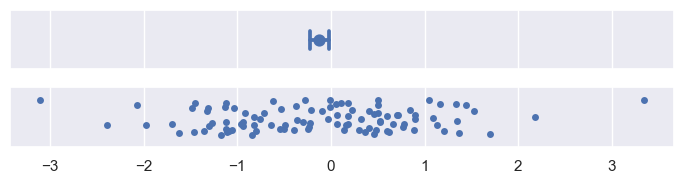

In [5]:
plot_errorbars("se")

### 신뢰 구간 error bar
Confidence interval error bars

<br>

불확실성을 표현하는 비모수적(nonparametric) 방식은 부트스트래핑(bootstrapping)을 사용합니다 : 데이터셋을 랜덤하게 여러번 샘플링하고, 각 샘플링된 데이터에서 추정치를 다시 계산합니다. 
이런 과정을 통해 다른 샘플(지금 주어진 데이터셋에는 없지만 아마 모집단에는 있을, 혹은 샘플의 크기가 더 커지면 포함될 가능성이 있는)이 추가로 주어졌다면 얻을 수 있는 추정치 값의 분포에 가깝게 통계 분포를 생성합니다.  
  
신뢰구간은 부트스트랩 분포에 백분위수 구간으로 만들어집니다. `errorbar="ci"`로 설정하면 default로 95% 신뢰구간을 그려줍니다 :

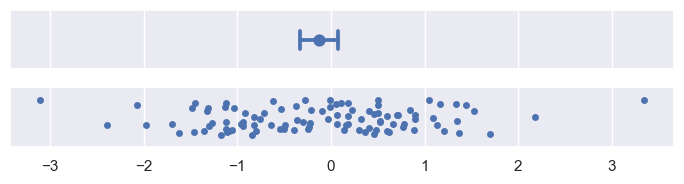

In [6]:
plot_errorbars("ci")

통계의 신뢰구간은 모수적, 비모수적 방식에 따라 달라지기 때문에 seaborn에서는 용어를 구체적으로 하고 있습니다.  

모수적(parametric)방식으로 신뢰구간을 그리려면 위에서처럼 표준편차(standard error)로 스케일링을 합니다. 
예를 들어, "+/- (2 * 표준편차)"로 95% 신뢰구간을 표현할 수 있습니다 :

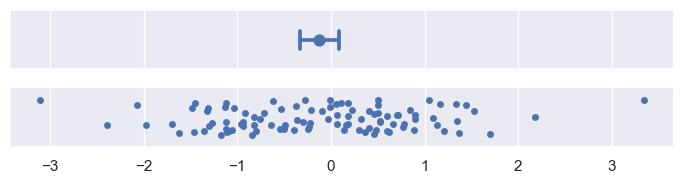

In [7]:
plot_errorbars(("se", 2))

비모수적(nonparametric) 부트스트래핑 방식은 백분위수 구간과 비슷한 장점이 있습니다 : 치우쳐져 있거나 값의 범위가 제한 있는 데이터에서 표준편차 구간의 범위를 신경쓰지 않아도 됩니다. 
그리고 표준오차 공식은 평균(mean)에만 사용 가능한 반면, 오차막대(error bar)는 다른 추정치에 대해서도 부트스트랩을 사용할 수 있어서 더 사용성이 좋습니다.

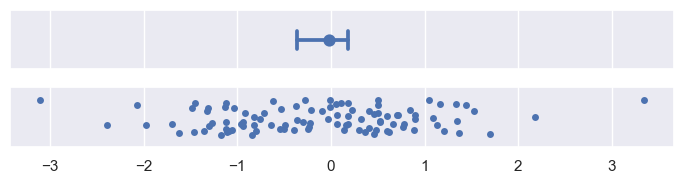

In [8]:
plot_errorbars("ci", estimator="median")

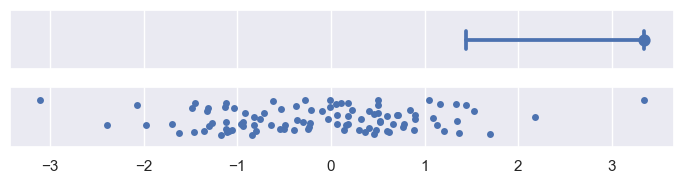

In [9]:
plot_errorbars("ci", estimator="max")

부트스트랩핑은 그 과정에서 무작위성(randomness)를 포함하고 있기 때문에 코드를 실행할 때마다 error bar가 약간씩 다르게 표시됩니다. 
이 랜덤성은 parameter로 어느정도 제어할 수도 있습니다. 
* `n_boot` 반복횟수 : 반복 횟수가 많을수록 결과의 폭(interval)이 더 일정하게 됩니다.
* `seed` 난수 생성 : 동일한 seed 넘버를 설정하면 동일한 결과가 나오게 됩니다.

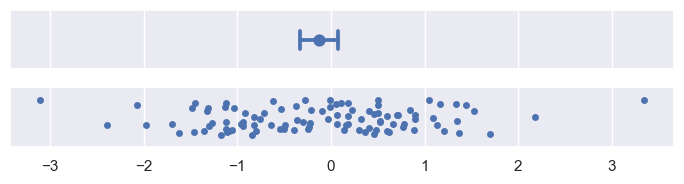

In [10]:
plot_errorbars("ci", n_boot=5000, seed=10)

부트스트랩핑은 반복적인 계산이 포함되기 떄문에 리소스를 많이 사용하게 됩니다. 
특히 데이터셋이 큰 경우에는 계산이 오래 걸릴 수 있습니다. 
하지만 이 경우 샘플크기가 커지면 불확실성이 감소하기 때문에 데이터의 화산(spread)를 나타내는 error bar를 사용하면 더 많은 정보를 제공할 수 있습니다.

### 사용자 정의에 따른 error bar
Custom error bars

<br>

위에서 제공하는 기능들 외에도 필요한 경우 일반 함수를 `errorbar` parameter에 전달할 수도 있습니다. 
이 때 함수는 벡터를 받아 간격의 최소 및 최대 지점을 나타내는 한 쌍의 값을 생성해야 합니다 :

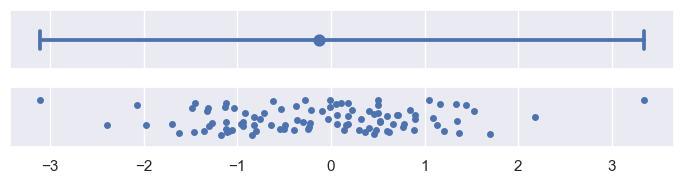

In [11]:
plot_errorbars(lambda x: (x.min(), x.max()))

(실제로는 위에 표시된 사용자 지정 함수 대신 `errorbar=("pi", 100)`를 사용하여 데이터의 전체 범위를 표시할 수 있습니다.)


현재 seaborn에서는 외부에서 계산된 값으로 오차 막대를 그릴 수 없지만, matplotlib 함수를 사용하여 이러한 오차 막대를 seaborn의 plot에 추가할 수는 있습니다.

## 회귀에서 error bar
Error bars on regression fits

앞서 설명한 내용은 집계 데이터의 매개변수 추정치 주위에 표시되는 오차 막대에 중점을 두었습니다. 관계를 시각화하기 위해 회귀 모델을 추정할 때에도 오차 막대가 발생합니다. 여기서 오차 막대는 회귀선 주위의 '밴드'로 표시됩니다 :

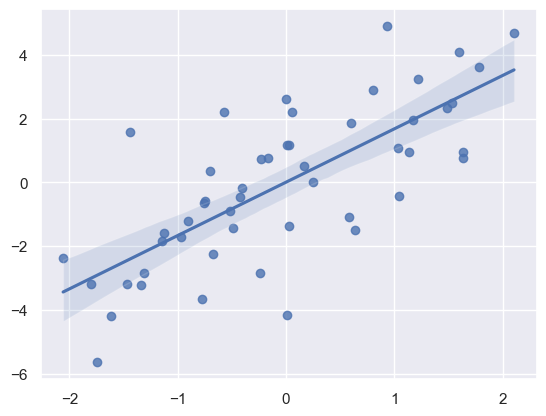

In [18]:
x = np.random.normal(0, 1, 50)
y = x*2 + np.random.normal(0, 2, size=x.size)
sns.regplot(x=x, y=y);

현재 seaborn에서 회귀추정의 error bar는 지금까지 살펴본 error bar에 비해 덜 유연합니다. 
(`ci=` parameter를 통해 신뢰구간의 크기만 설정할 수 있습니다.)
향후 버전에서는 기능이 추가될 수 있습니다. 

## error bar로 충분할까?
Are error bars enough?

하지만 이런 요약 통계와 오차 막대를 플롯에 표시하는 것만으로토 충분한지 항상 주의깊게 생각해봐야 합니다. 
  
얻고자 하는 정보가 요약통계(summary; ex. 평균값이 그룹 간에 차이가 있는지, 시간이 흐르면서 차이가 증가하는지)인 경우, 집계(aggregation)를 사용하면 플롯의 복잡성은 줄어들고 추론을 쉽게 할 수 있습니다. 하지만 대신에 분포의 모양이나 이상치의 존재 여부와 같은 개별 데이터에 대한 중요한 정보가 가려집니다.  
  
자체 데이터를 분석할 때는 요약통계에서 끝내면 안됩니다. 항상 데이터의 분포도 함께 확인해야 합니다. 경우에 따라서는 이 두 가지(요약통계와 데이터의 분포)를 하나의 plot에 함께 표현하는 것도 도움이 될 수 있습니다. seaborn은 이런 표현을 위한 여러 방법이 있는데, 대표적으로 앞서 살펴본 [categorical tutorial](https://seaborn.pydata.org/tutorial/categorical.html)의 기능들이 있습니다.